# Appendix

# Import packages

In [1]:
import numpy as np 
import pandas as pd 

import statsmodels.formula.api as sm
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, roc_curve 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from collections import OrderedDict


import scikitplot as skplt
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

In [2]:
%matplotlib inline

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [4]:
#read in datasets
urltest = 'https://raw.githubusercontent.com/djp840/MSDS_422_Public/master/MSDS422_Assignment_03/data/MSDS422_test.csv'
test_df=pd.read_csv(urltest)

urltrain = 'https://raw.githubusercontent.com/djp840/MSDS_422_Public/master/MSDS422_Assignment_03/data/MSDS422_train.csv'
train_df=pd.read_csv(urltrain)

In [5]:
#Check Heads of Both Datasets
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#check types
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#see shape
test_df.shape

(418, 11)

In [10]:
train_df.shape

(891, 12)

In [11]:
#see if there are NA values for both test and train
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#see if there are NA values for both test and train
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
#check summary stats for both
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0, 0.5, 'Counts')

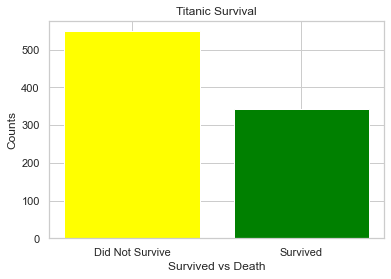

In [15]:
#make barplot
plt.bar(['Did Not Survive','Survived'],[train_df['Survived'].value_counts()[0], 
                                        train_df['Survived'].value_counts()[1]],
       color = ['yellow', 'green'])
plt.title('Titanic Survival')
plt.xlabel('Survived vs Death')
plt.ylabel('Counts')

Text(0, 0.5, 'Fare')

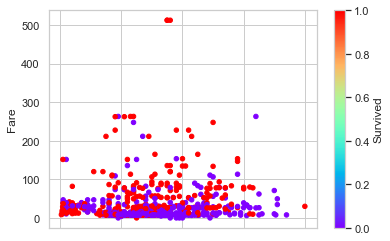

In [16]:
#make scatterplot

train_df.plot.scatter('Age', 'Fare', c='Survived', cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Fare')

Text(0, 0.5, 'Counts')

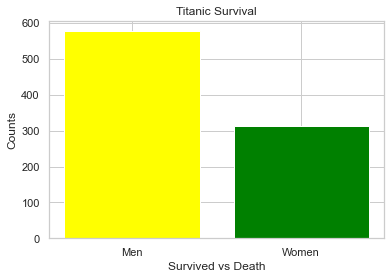

In [17]:
#make barplot
plt.bar(['Men','Women'],[train_df.groupby('Sex').count()['Survived'][1], 
                         train_df.groupby('Sex').count()['Survived'][0]],
       color = ['yellow', 'green'])
plt.title('Titanic Survival')
plt.xlabel('Survived vs Death')
plt.ylabel('Counts')


Text(0.5, 1.0, 'Histogram of Genders survived')

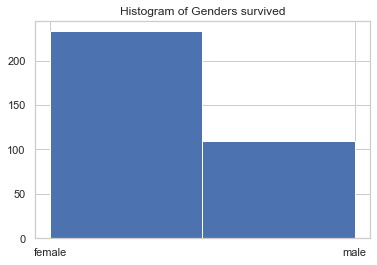

In [18]:
#make histogram
plt.hist(train_df[train_df['Survived'] == 1]['Sex'], bins = 2)
plt.title('Histogram of Genders survived')

In [19]:
#make pie chart/make ratios
class1 = train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1][1] / train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1].sum()
class2 = train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1][2] / train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1].sum()
class3 = train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1][3] / train_df.groupby(['Survived', 'Pclass']).count()['PassengerId'][1].sum()



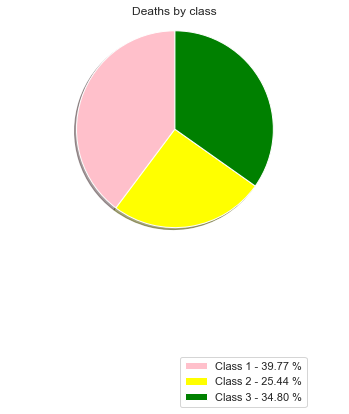

In [20]:
x =  ['Class 1', 'Class 2', 'Class 3']
sizes = [class1, class2, class3]
percent = [class1*100, class2*100, class3*100]
colors = ['pink', 'yellow', 'green', 'blue', 'purple', 'red', 'silver', 'orange', 'black', 'brown']
explode = (0, 0, 0, 0, 0, 0,0,0,0,0)  # explode 1st slice
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
# Plot
plt.title("Deaths by class")
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="lower left", bbox_to_anchor=(0.5,-0.80))
plt.axis('equal')
plt.show()

In [21]:
#check for NA values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

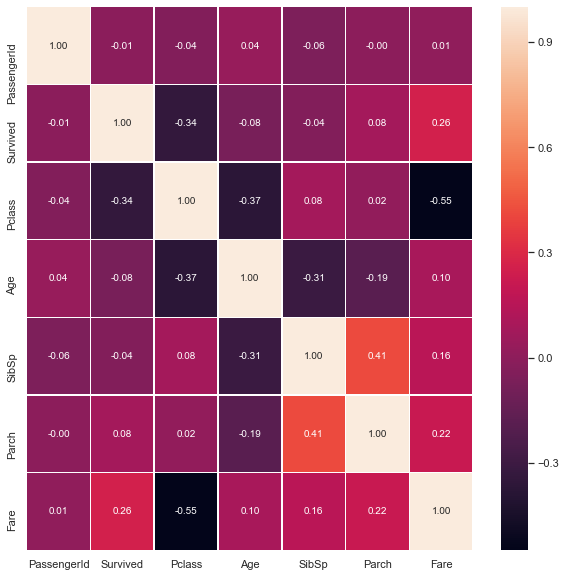

In [23]:
#imputing age 
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_df.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

In [24]:
#compute median
medagetrain = train_df.groupby(['Pclass', 'SibSp']).median()
medagetrain

PassengerId  Survived   Age  Parch      Fare
Pclass SibSp                                              
1      0            476.0       1.0  37.0    0.0   39.6000
       1            485.0       1.0  38.0    0.0   79.2000
       2            572.0       1.0  44.0    0.0  133.6500
       3             89.0       1.0  23.0    2.0  263.0000
2      0            407.0       0.0  30.0    0.0   13.0000
       1            451.0       1.0  29.0    1.0   26.0000
       2            565.5       0.5  23.5    1.0   39.0000
       3            727.0       1.0  30.0    0.0   21.0000
3      0            472.0       0.0  26.0    0.0    7.8958
       1            372.0       0.0  25.0    0.0   15.5500
       2            334.0       0.0  19.5    0.0   19.2583
       3            302.5       0.0   6.0    1.0   25.4667
       4            264.5       0.0   6.5    1.5   31.2750
       5            387.0       0.0  11.0    2.0   46.9000
       8            325.0       0.0   NaN    2.0   69.5500

In [25]:
#compute median of every column
medagetest = test_df.groupby(['Pclass', 'SibSp']).median()
medagetest

PassengerId   Age  Parch       Fare
Pclass SibSp                                     
1      0           1088.0  39.0    0.0   42.50000
       1           1109.5  46.0    0.0   82.06250
       2            969.0  55.0    0.0   51.47920
       3            945.0  28.0    2.0  263.00000
2      0           1117.5  27.0    0.0   13.00000
       1           1139.0  29.0    0.0   26.00000
       2           1077.5  21.0    0.5   31.50000
3      0           1095.5  24.0    0.0    7.82920
       1           1084.0  20.0    1.0   15.24580
       2           1059.0  19.5    0.0   21.67920
       3           1281.0  29.0    1.0   21.07500
       4           1076.0  11.5    2.0   30.25625
       5           1032.0  10.0    2.0   46.90000
       8           1166.0  14.5    2.0   69.55000

In [26]:
#This function is a case of if else's to impute age by median age of subgroups, .loc finds exact index from above groupby
#functions
def impute_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()

In [27]:
#Fill in NA for Age and 
train_df['Age'] = train_df['Age'].fillna(impute_age(train_df, medagetrain))
test_df['Age'] = test_df['Age'].fillna(impute_age(test_df, medagetest))

In [28]:
#Check missing values again for both data sets; we see age is taken care of
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
#Next we have to fill in missing values for cabin; we can fill this in with O
train_df['Cabin'] = train_df['Cabin'].fillna('O')
test_df['Cabin'] = test_df['Cabin'].fillna('O')

In [31]:
#We check again and we see Cabin has been filled
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [32]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [33]:
#We can deal with Fare by using mean imputation to fill NA value for Fsre for test
test_df['Fare'] = test_df['Fare'].fillna(np.mean(test_df['Fare']))

In [34]:
#test is all fixed
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [35]:
#Now we deal with Embarked; we fill it with the mode of the column S
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [36]:
#Next we want to fix Column Cabin to only show the number; for this we can use a lambda function
train_df["Cabin"]=train_df["Cabin"].map(lambda x: x[0])
test_df["Cabin"]=test_df["Cabin"].map(lambda x: x[0])

In [37]:
train_df['Cabin'].head()

0    O
1    C
2    O
3    C
4    O
Name: Cabin, dtype: object

In [38]:
training_df = train_df.copy()

In [39]:
training_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,O,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,O,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [40]:
#We see that has been fixed; encode features
def cabin_assignment(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0)

def embark_assignment(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0)


sex_map={"male":1,"female":0}
train_df["Sex"]=train_df["Sex"].map(sex_map)
test_df["Sex"]=test_df["Sex"].map(sex_map)
training_df["Sex"]=training_df["Sex"].map(sex_map)

In [41]:
#use functions on both test and train
cabin_assignment(train_df)
embark_assignment(train_df)

In [42]:
cabin_assignment(test_df)
embark_assignment(test_df)

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Cabin A        891 non-null int64
Cabin B        891 non-null int64
Cabin C        891 non-null int64
Cabin D        891 non-null int64
Cabin E        891 non-null int64
Cabin F        891 non-null int64
Cabin G        891 non-null int64
Cabin T        891 non-null int64
Embarked S     891 non-null int64
Embarked C     891 non-null int64
dtypes: float64(2), int64(16), object(4)
memory usage: 153.3+ KB


In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
Cabin A        418 non-null int64
Cabin B        418 non-null int64
Cabin C        418 non-null int64
Cabin D        418 non-null int64
Cabin E        418 non-null int64
Cabin F        418 non-null int64
Cabin G        418 non-null int64
Cabin T        418 non-null int64
Embarked S     418 non-null int64
Embarked C     418 non-null int64
dtypes: float64(2), int64(15), object(4)
memory usage: 68.7+ KB


In [45]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [46]:
#Make new feature which is total siblings, spouse, parents etc.
train_df['Fammemb'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Fammemb'] = test_df['SibSp'] + test_df['Parch'] + 1
training_df['Fammemb'] = training_df['SibSp'] + training_df['Parch'] + 1 

In [47]:
#make copy
training_df1=train_df.copy()
test_df1=test_df.copy()

In [48]:
#We are now ready for training; We should drop off features which we do not think are necessary
train_df.drop(["Name","Ticket","PassengerId","Embarked","Cabin","SibSp","Parch"],inplace=True,axis=1)
test_df.drop(["Name","Ticket","Embarked","Cabin","SibSp","Parch"],inplace=True,axis=1)
training_df.drop(["Name","Ticket","PassengerId","SibSp","Parch"],inplace=True,axis=1)
training_df['Cabin'] = training_df['Cabin'].astype('category').cat.codes
training_df['Embarked'] = training_df['Embarked'].astype('category').cat.codes
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
Cabin       891 non-null int8
Embarked    891 non-null int8
Fammemb     891 non-null int64
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


In [49]:
training_df.head(1000)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Fammemb
0,0,3,1,22.0,7.2500,7,2,2
1,1,1,0,38.0,71.2833,2,0,2
2,1,3,0,26.0,7.9250,7,2,1
3,1,1,0,35.0,53.1000,2,2,2
4,0,3,1,35.0,8.0500,7,2,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,7,2,1
887,1,1,0,19.0,30.0000,1,2,1
888,0,3,0,25.0,23.4500,7,2,4
889,1,1,1,26.0,30.0000,2,0,1


In [50]:
#see end of data set
train_df.tail()

,Survived,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,Fammemb
886,0,2,1,27.0,13.00,0,0,0,0,0,0,0,0,1,0,1
887,1,1,0,19.0,30.00,0,1,0,0,0,0,0,0,1,0,1
888,0,3,0,25.0,23.45,0,0,0,0,0,0,0,0,1,0,4
889,1,1,1,26.0,30.00,0,0,1,0,0,0,0,0,0,1,1
890,0,3,1,32.0,7.75,0,0,0,0,0,0,0,0,0,0,1


In [51]:
#scale data by min max scaler
train_df=train_df.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

In [52]:
#Next save response variable and drop from training set
x = train_df.drop(['Survived'], 1)
y = training_df1["Survived"]
x1 = training_df.drop(['Survived'], 1)
y1 = training_df1["Survived"]

In [53]:
x.shape, y.shape

((891, 15), (891,))

In [54]:
x1.shape, y.shape

((891, 7), (891,))

In [55]:
#we want to split training data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=0)
x_train1.shape, x_test1.shape

((712, 7), (179, 7))

In [56]:
x_train.shape, x_test.shape

((712, 15), (179, 15))

In [57]:
#check head after split
x_train.head()

,Pclass,Sex,Age,Fare,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C,Fammemb
140,1.0,0.0,0.308872,0.029758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2
439,0.5,1.0,0.384267,0.020495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
817,0.5,1.0,0.384267,0.072227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2
378,1.0,1.0,0.246042,0.007832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
491,1.0,1.0,0.258608,0.014151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [59]:
#custom functions
def acc_score(model, x_train, y_train):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"))

def confusion_matrix_model(model_used, x_test, y_test):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm
def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [60]:
def aucscore(model,x_test, y_test, has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc
def plt_roc_curve(name,model,x_test, y_test, has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

In [61]:
#time for training
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
print("Accuracy: " + str(acc_score(log_reg, x_train, y_train)))
confusion_matrix_model(log_reg, x_train, y_train)



Accuracy: 0.7935979513444302


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.29,0.71


In [62]:
#print formula coefficients as well as intercept
print(log_reg.coef_)

[[-1.6696145  -2.51302151 -2.1370189   0.56786685  0.25773991  0.20372611
  -0.26103434  0.50392596  1.17361218  0.80805185  0.01662876 -0.24454108
  -0.36161555  0.03115022 -1.28660895]]


In [63]:
print(log_reg.intercept_)

[3.15140194]


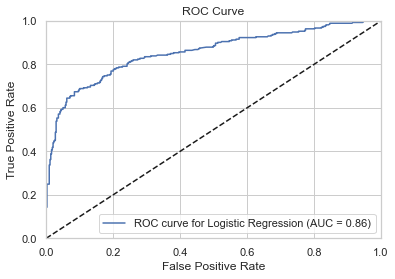

In [64]:
#see ROC curve
plt_roc_curve("Logistic Regression", log_reg, x_train, y_train, has_proba=True)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

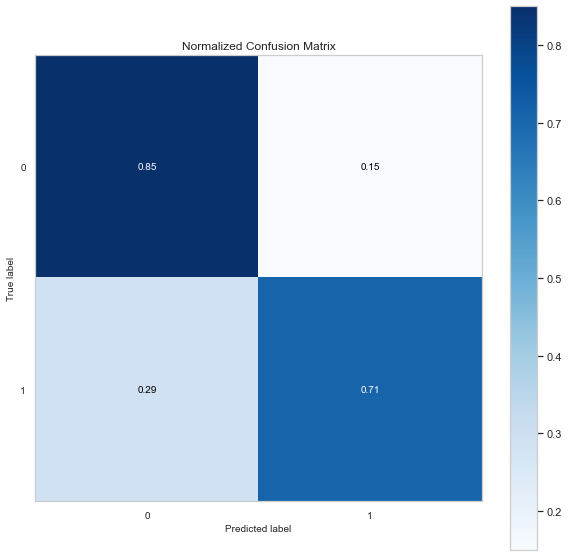

In [65]:
skplt.metrics.plot_confusion_matrix(y_train, log_reg.predict(x_train),normalize=True, figsize=(10,10))


In [66]:
#time for training
log_reg=LogisticRegression()
log_reg.fit(x_test,y_test)
print("Accuracy: " + str(acc_score(log_reg, x_test, y_test)))
confusion_matrix_model(log_reg, x_test, y_test)


Accuracy: 0.7874603174603174


,Predicted Dead,Predicted Survived
Actual Dead,0.87,0.13
Actual Survived,0.25,0.75


In [67]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-1.53119647 -2.40533073 -0.3662788   0.2950648   0.          0.74364169
   0.63108398  1.12790299 -0.00792574  0.62149717 -0.39438881  0.
  -0.04948702  0.73264367 -0.20547853]]
[1.71264417]


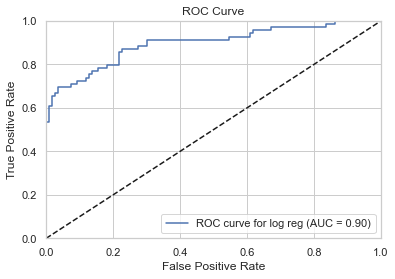

In [68]:
plt_roc_curve("log reg",log_reg, x_test, y_test, has_proba=True)

In [69]:
confusion_matrix_model(log_reg, x_test, y_test)

,Predicted Dead,Predicted Survived
Actual Dead,0.87,0.13
Actual Survived,0.25,0.75


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

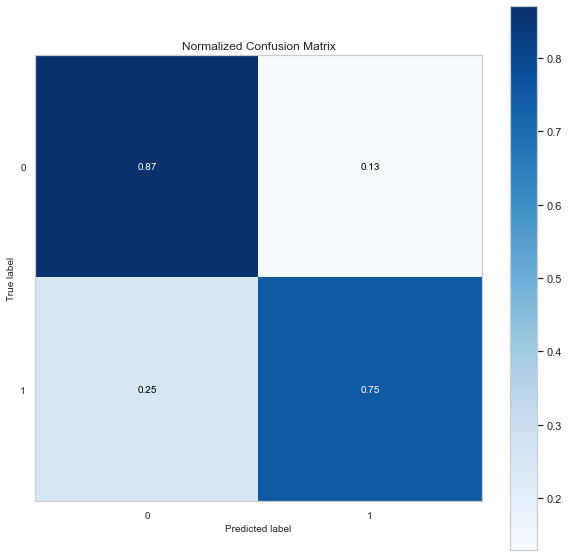

In [70]:
skplt.metrics.plot_confusion_matrix(y_test, log_reg.predict(x_test),normalize=True, figsize=(10,10))

In [71]:
from sklearn.ensemble import RandomForestClassifier # Random Forest package
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees package
Randreg = RandomForestClassifier(oob_score = True)

# Fit data on to the model
Randreg.fit(x_train1, y_train1)
print(Randreg.oob_score_)
# Predict
y_predicted_Randreg = Randreg.predict(x_test1)

0.800561797752809


In [72]:
print("Accuracy: " + str(acc_score(Randreg, x_train1, y_train1)))
print(aucscore(Randreg, x_train1, y_train1, has_proba=True))
confusion_matrix_model(Randreg, x_train1, y_train1)


Accuracy: 0.7993203979119471
0.9981100903652157


,Predicted Dead,Predicted Survived
Actual Dead,0.99,0.01
Actual Survived,0.02,0.98


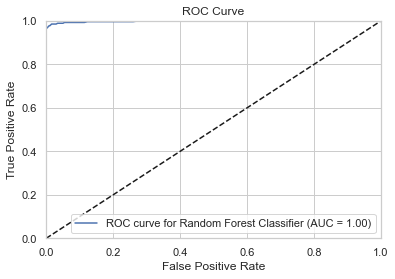

In [73]:
plt_roc_curve("Random Forest Classifier",Randreg,x_train1, y_train1, has_proba=True)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

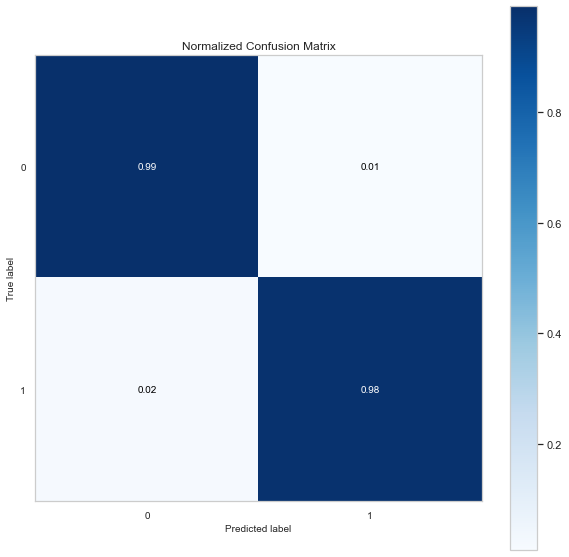

In [74]:
skplt.metrics.plot_confusion_matrix(y_train1, Randreg.predict(x_train1),normalize=True, figsize=(10,10))


In [75]:
ETreg = ExtraTreesClassifier()

# Fit data on to the model
ETreg.fit(x_train1, y_train1)

# Predict
y_predicted_ETreg = ETreg.predict(x_test1)

In [76]:
print("Accuracy: " + str(acc_score(ETreg, x_train1, y_train1)))
ETacc=acc_score(ETreg, x_train1, y_train1)
confusion_matrix_model(ETreg, x_train1, y_train1)

Accuracy: 0.7810006894513937


,Predicted Dead,Predicted Survived
Actual Dead,1.00,0.00
Actual Survived,0.04,0.96


In [77]:
ETreg.feature_importances_

array([0.0854828 , 0.28002679, 0.24329833, 0.22477831, 0.06475646,
       0.03132265, 0.07033466])

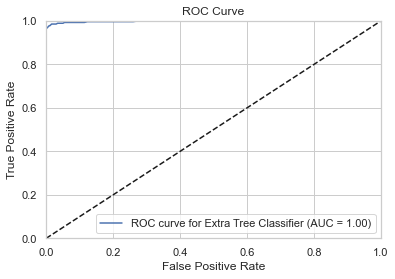

In [78]:
plt_roc_curve("Extra Tree Classifier",Randreg, x_train1, y_train1, has_proba=True)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

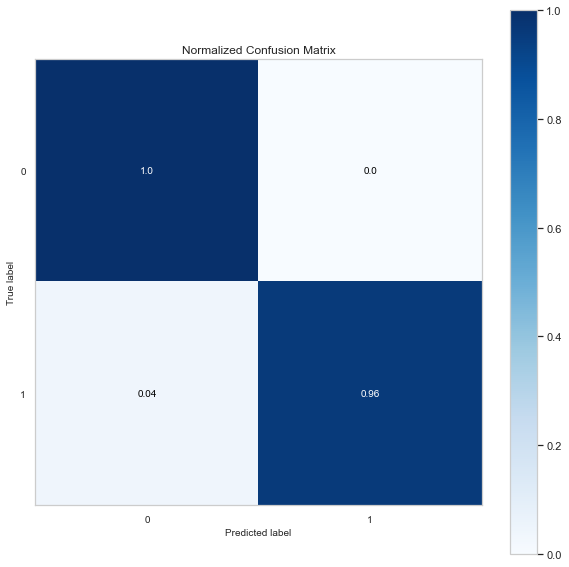

In [79]:
skplt.metrics.plot_confusion_matrix(y_train1, ETreg.predict(x_train1),normalize=True, figsize=(10,10))

In [80]:
Classifiers=["Logistic Regression","Random Forrest Classifier","Extra Trees Classifier"]
Acc=[acc_score(x, x_train, y_train) for x in [log_reg]]
Acc.append(acc_score(Randreg, x_train1, y_train1))
Acc.append(acc_score(ETreg, x_train1, y_train1))
auc_scores_prob=[aucscore(x, x_train, y_train,has_proba=True) for x in [log_reg]]
auc_scores_prob.append(acc_score(Randreg, x_train1, y_train1))
auc_scores_prob.append(acc_score(ETreg, x_train1, y_train1))
auc_scores=auc_scores_prob[:3] + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

,Classifier,Accuracy,AUC
0,Logistic Regression,0.793598,0.838932
1,Random Forrest Classifier,0.803546,0.795075
2,Extra Trees Classifier,0.783788,0.788004


In [81]:
Randreg = RandomForestClassifier(oob_score = True)

# Fit data on to the model
Randreg.fit(x_test1, y_test1)
print(Randreg.oob_score_)
print("Accuracy: " + str(acc_score(Randreg, x_test1, y_test1)))
print(aucscore(Randreg, x_test1, y_test1, has_proba=True))
confusion_matrix_model(Randreg, x_test1, y_test1)

0.8603351955307262
Accuracy: 0.8820634920634921
1.0


,Predicted Dead,Predicted Survived
Actual Dead,1.0,0.0
Actual Survived,0.0,1.0


In [82]:
ETreg = ExtraTreesClassifier()

# Fit data on to the model
ETreg.fit(x_test1, y_test1)

print("Accuracy: " + str(acc_score(ETreg, x_test, y_test)))
ETacc=acc_score(ETreg, x_test1, y_test1)
confusion_matrix_model(ETreg, x_test1, y_test1)



Accuracy: 0.8433333333333334


,Predicted Dead,Predicted Survived
Actual Dead,1.0,0.0
Actual Survived,0.0,1.0


In [83]:
ETreg.feature_importances_

array([0.10913612, 0.27002161, 0.1530056 , 0.19342465, 0.1208983 ,
       0.04691237, 0.10660134])

In [84]:
Classifiers=["Logistic Regression","Random Forrest Classifier","Extra Trees Classifier"]
Acc=[acc_score(x, x_test, y_test) for x in [log_reg]]
Acc.append(acc_score(Randreg, x_test1, y_test1))
Acc.append(acc_score(ETreg, x_test1, y_test1))
auc_scores_prob=[aucscore(x, x_test, y_test,has_proba=True) for x in [log_reg]]
auc_scores_prob.append(acc_score(Randreg, x_train1, y_train1))
auc_scores_prob.append(acc_score(ETreg, x_train1, y_train1))
auc_scores=auc_scores_prob[:3] + auc_scores_prob[3:]
cols=["Classifier","Accuracy","AUC"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results["AUC"]=auc_scores
results

,Classifier,Accuracy,AUC
0,Logistic Regression,0.787460,0.895652
1,Random Forrest Classifier,0.870794,0.806323
2,Extra Trees Classifier,0.849048,0.778203
